In [17]:
#import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')

#load the dataset onto  the jupyter notebook
data = pd.read_csv('medical_market_basket.csv')

#explore the original data
data.head(5)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#display the transaction example at index 3 without NaN values
transaction_example_3 = data.iloc[3]
transaction_example_3 = transaction_example_3[transaction_example_3.notna()]
transaction_example_3


Presc01                   citalopram
Presc02                      benicar
Presc03    amphetamine salt combo xr
Name: 3, dtype: object

In [19]:
#get dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  5747 non-null   object
 2   Presc03  4389 non-null   object
 3   Presc04  3345 non-null   object
 4   Presc05  2529 non-null   object
 5   Presc06  1864 non-null   object
 6   Presc07  1369 non-null   object
 7   Presc08  981 non-null    object
 8   Presc09  654 non-null    object
 9   Presc10  395 non-null    object
 10  Presc11  256 non-null    object
 11  Presc12  154 non-null    object
 12  Presc13  87 non-null     object
 13  Presc14  47 non-null     object
 14  Presc15  25 non-null     object
 15  Presc16  8 non-null      object
 16  Presc17  4 non-null      object
 17  Presc18  4 non-null      object
 18  Presc19  3 non-null      object
 19  Presc20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [20]:
#display original dataset shape
print("Original data shape:", data.shape)

Original data shape: (15002, 20)


In [21]:
#drop blank rows from dataset (remove rows with Not Null values)
data = data[data['Presc01'].notna()]

#display the shape of the dataset after dropping rows with null values
print("New data shape:", data.shape)


New data shape: (7501, 20)


In [22]:
#convert dataset to a list of lists
rows = []
for i in range(0, 7501):
    rows.append([str(data.values[i, j]) for j in range(0, 20)])


In [23]:
#feed the list to TransactionEncoder
TE = TransactionEncoder()
array = TE.fit(rows).transform(rows)

#return array to DataFrame
transaction = pd.DataFrame(array, columns=TE.columns_)

#display transaction
transaction

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
#display items as columns
for col in transaction.columns:
    print(col)

Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
met

In [25]:
#remove NAN calumns from transformed dataset
cleaned_df = transaction.drop(['nan'], axis = 1)
cleaned_df.head(7505)

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
#save cleaned data as csv file
cleaned_df.to_csv('cleaned_df_D212_task3.csv', index = False)
cleaned_df.columns

Index(['Duloxetine', 'Premarin', 'Yaz', 'abilify', 'acetaminophen', 'actonel',
       'albuterol HFA', 'albuterol aerosol', 'alendronate', 'allopurinol',
       ...
       'trazodone HCI', 'triamcinolone Ace topical', 'triamterene',
       'trimethoprim DS', 'valaciclovir', 'valsartan', 'venlafaxine XR',
       'verapamil SR', 'viagra', 'zolpidem'],
      dtype='object', length=119)

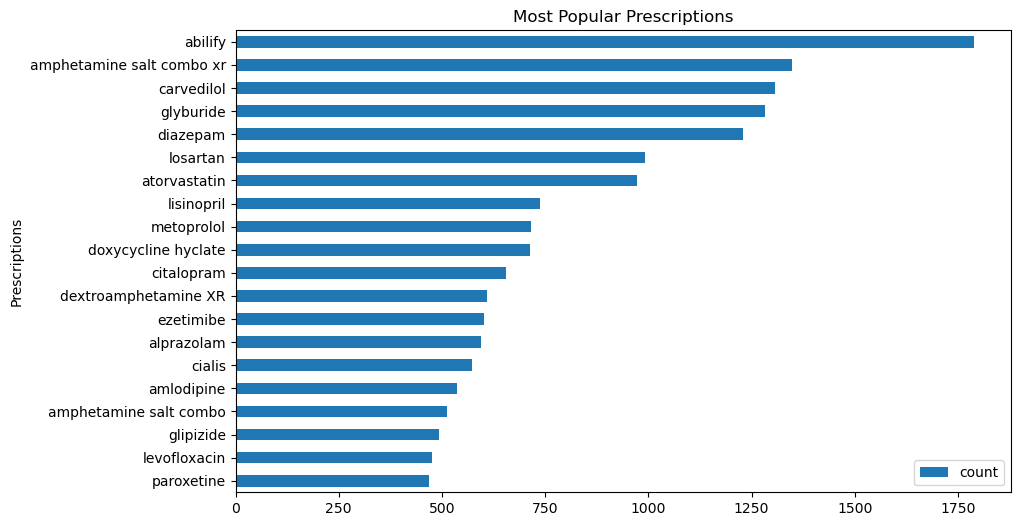

In [27]:
#get the 20 most popular prescriptions in the transformed dataset 
count = cleaned_df.loc[:,:].sum()
pop_item = count.sort_values(ascending=False).head(20)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {'index': 'Prescriptions', 0:'count'})

#visualize the top 20 prescriptions in a horizontal bar graph
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)
ax = pop_item.plot.barh(x='Prescriptions', y='count')
plt.title('Most Popular Prescriptions')
plt.gca().invert_yaxis()

In [28]:
#create apriori object called "rules" (includes only items which have a support value of 0.02 or higher)
rules = apriori(cleaned_df, min_support = 0.02, use_colnames = True)
rules

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.020397,(albuterol aerosol)
3,0.033329,(allopurinol)
4,0.079323,(alprazolam)
...,...,...
98,0.023064,"(lisinopril, diazepam)"
99,0.023464,"(losartan, diazepam)"
100,0.022930,"(metoprolol, diazepam)"
101,0.020131,"(doxycycline hyclate, glyburide)"


In [29]:
#create the Rules Table
rul_table = association_rules(rules, metric='lift', min_threshold=1.0, num_itemsets=len(rules))
rul_table.head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,1.0,0.006564,1.030562,0.365218,0.082441,0.029655,0.214609
1,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,1.0,0.006564,1.137144,0.299568,0.082441,0.120604,0.214609
2,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,1.0,0.008095,1.037830,0.435627,0.086402,0.036451,0.229537
3,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,1.0,0.008095,1.183991,0.356144,0.086402,0.155399,0.229537
4,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515
5,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
6,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,1.0,0.017105,1.209650,0.409465,0.150000,0.173315,0.285856
7,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,1.0,0.017105,1.089850,0.467950,0.150000,0.082443,0.285856
8,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
9,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796


In [30]:
#sort rules by metric
#sort by support
top_three_rules = rul_table.sort_values('support', ascending= False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
9,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
19,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158


In [31]:
#get the indices of the top three rules
idx1, idx2, idx3 = top_three_rules.index[:3]

#interpret support results
print("Interpreting Support:")
print("The probability that both", list(top_three_rules.loc[idx1, 'antecedents']), "and", list(top_three_rules.loc[idx1, 'consequents']), "are purchased in the same transaction is", (top_three_rules.loc[idx1, 'support']*100).round(2), "%")
print("The probability that both", list(top_three_rules.loc[idx2, 'antecedents']), "and", list(top_three_rules.loc[idx2, 'consequents']), "are purchased in the same transaction is", (top_three_rules.loc[idx2, 'support']*100).round(2), "%")
print("The probability that both", list(top_three_rules.loc[idx3, 'antecedents']), "and", list(top_three_rules.loc[idx3, 'consequents']), "are purchased in the same transaction is", (top_three_rules.loc[idx3, 'support']*100).round(2), "%")


Interpreting Support:
The probability that both ['carvedilol'] and ['abilify'] are purchased in the same transaction is 5.97 %
The probability that both ['abilify'] and ['carvedilol'] are purchased in the same transaction is 5.97 %
The probability that both ['diazepam'] and ['abilify'] are purchased in the same transaction is 5.27 %


In [32]:
#sort rules by metric
##sort by lift
top_three_rules = rul_table.sort_values('lift', ascending= False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
75,(carvedilol),(lisinopril),0.174110,0.098254,0.039195,0.225115,2.291162,1.0,0.022088,1.163716,0.682343,0.168096,0.140684,0.312015
74,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
73,(glipizide),(carvedilol),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939


In [33]:
#get the indices of the top three rules
idx1, idx2, idx3 = top_three_rules.index[:3]

#print lift results
print("\nInterpreting Lift:")
print("The rule", list(top_three_rules.loc[idx1, 'antecedents']), "=>", list(top_three_rules.loc[idx1, 'consequents']), "has a lift of", top_three_rules.loc[idx1, 'lift'].round(2))
print("The rule", list(top_three_rules.loc[idx2, 'antecedents']), "=>", list(top_three_rules.loc[idx2, 'consequents']), "has a lift of", top_three_rules.loc[idx2, 'lift'].round(2))
print("The rule", list(top_three_rules.loc[idx3, 'antecedents']), "=>", list(top_three_rules.loc[idx3, 'consequents']), "has a lift of", top_three_rules.loc[idx3, 'lift'].round(2))



Interpreting Lift:
The rule ['carvedilol'] => ['lisinopril'] has a lift of 2.29
The rule ['lisinopril'] => ['carvedilol'] has a lift of 2.29
The rule ['glipizide'] => ['carvedilol'] has a lift of 2.0


In [34]:
#sort rules by metric
##by confidence
top_three_rules = rul_table.sort_values('confidence', ascending= False).head(3) 
top_three_rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
31,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
25,(glipizide),(abilify),0.065858,0.238368,0.027596,0.419028,1.757904,1.0,0.011898,1.310962,0.461536,0.099759,0.237201,0.267400
28,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,1.0,0.017507,1.305401,0.474369,0.138413,0.233952,0.294127


In [35]:
#get the indices of the top three rules
idx1, idx2, idx3 = top_three_rules.index[:3]

#print confidence results
print("\nInterpreting Confidence:")
print("Given", list(top_three_rules.loc[idx1, 'antecedents']), "appear,", (top_three_rules.loc[idx1, 'confidence']*100).round(2), "% of the times", list(top_three_rules.loc[idx1, 'consequents']), "also appear.")
print("Given", list(top_three_rules.loc[idx2, 'antecedents']), "appear,", (top_three_rules.loc[idx2, 'confidence']*100).round(2), "% of the times", list(top_three_rules.loc[idx2, 'consequents']), "also appear.")
print("Given", list(top_three_rules.loc[idx3, 'antecedents']), "appear,", (top_three_rules.loc[idx3, 'confidence']*100).round(2), "% of the times", list(top_three_rules.loc[idx3, 'consequents']), "also appear.")



Interpreting Confidence:
Given ['metformin'] appear, 45.65 % of the times ['abilify'] also appear.
Given ['glipizide'] appear, 41.9 % of the times ['abilify'] also appear.
Given ['lisinopril'] appear, 41.66 % of the times ['abilify'] also appear.
